## Philadelphia Crime Data 2006 - 2020

The dataset used for this data analysis was retrieved on June 7, 2021 from: https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/

In [1]:
#Dependencies
import pandas as pd
import os

In [2]:
#Read .csv file containing Philly Crime Data
df = pd.read_csv("Resources/incidents_part1_part2.csv")
df.head()

,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,107,6,1,2013-05-28 09:43:00,2013-05-28,09:43:00,9.0,201306025636,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
1,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,108,6,1,2013-11-26 10:24:00,2013-11-26,10:24:00,10.0,201306061456,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441
2,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,109,6,1,2013-12-16 13:10:00,2013-12-16,13:10:00,13.0,201306064336,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
3,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
4,0101000020E6100000FB79CF5866C552C0942E81847604...,0101000020110F0000A78BF98174E25FC145F74595D894...,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372


In [3]:
from folium.plugins import HeatMap
from folium import plugins
from collections import namedtuple


#import geopandas # working with geospatial data in python easier
import folium #visualize spatial data in an interactive manner

import numpy as np # linear algebra
import seaborn as sns # data visualization library based on matplotlib
import missingno as msn
import matplotlib.pyplot as plt

In [4]:
# Remove all NA values from the dataset 
df = df.dropna()

In [5]:
df.dtypes

the_geom                 object
the_geom_webmercator     object
objectid                  int64
dc_dist                   int64
psa                      object
dispatch_date_time       object
dispatch_date            object
dispatch_time            object
hour_                   float64
dc_key                    int64
location_block           object
ucr_general               int64
text_general_code        object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtype: object

In [6]:
# Order data by Date
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df = df.sort_values(by='dispatch_date_time', ascending=True)

In [7]:
# Create a separate list for each year, month and day
df['year_nr'] = df['dispatch_date_time'].dt.year
df['month_nr'] = df['dispatch_date_time'].dt.month
df['day_nr'] = df['dispatch_date_time'].dt.day

In [8]:
# Removing 2021 since the data is incomplete for the year (only contains data up to May 2021)
df = df[df.year_nr != 2021]

In [9]:
# Display the first 5 rows
df.head()

,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,year_nr,month_nr,day_nr
1341211,0101000020E6100000729AB291F3C952C078026918A1F8...,0101000020110F00008C4141C12FEA5FC1FAA9EC78BA87...,1336169,3,I,2006-01-01 00:00:00,2006-01-01,00:00:00,0.0,200603000002,S 08TH ST /SOUTH ST,2600,All Other Offenses,-75.155491,39.942416,39.942416,-75.155491,2006,1,1
2538412,0101000020E610000027AAD0A316CF52C07C22570377FB...,0101000020110F0000F7DCF188E9F25FC196DAC1BCDE8A...,2553218,19,P,2006-01-01 00:00:00,2006-01-01,00:00:00,20.0,200619000223,5700 BLOCK RACE STREET,100,Homicide - Criminal,-75.235757,39.964569,39.964569,-75.235757,2006,1,1
1341212,0101000020E6100000729AB291F3C952C078026918A1F8...,0101000020110F00008C4141C12FEA5FC1FAA9EC78BA87...,1336170,3,I,2006-01-01 00:02:00,2006-01-01,00:02:00,0.0,200603000001,S 08TH ST /SOUTH ST,2600,All Other Offenses,-75.155491,39.942416,39.942416,-75.155491,2006,1,1
1775219,0101000020E6100000F1F87276DDCE52C0F1C6D50A4BFB...,0101000020110F0000EDDCE76988F25FC1A2977403AE8A...,1774953,19,R,2006-01-01 00:02:00,2006-01-01,00:02:00,0.0,200619000047,5500 BLOCK CHERRY ST,800,Other Assaults,-75.232267,39.963228,39.963228,-75.232267,2006,1,1
2462191,0101000020E6100000E4166F3BDFCE52C01D9E90630CFA...,0101000020110F0000C395586B8BF25FC1125A71F14C89...,2471829,18,Q,2006-01-01 00:04:00,2006-01-01,00:04:00,0.0,200618000007,400 BLOCK S 55TH ST,1500,Weapon Violations,-75.232375,39.953503,39.953503,-75.232375,2006,1,1


### Visualizations 

#### Fig. 1: Total number of crimes committed per year

Text(0.5, 1.0, 'Total Number of Crimes Committed Per Year in Philadelphia, PA')

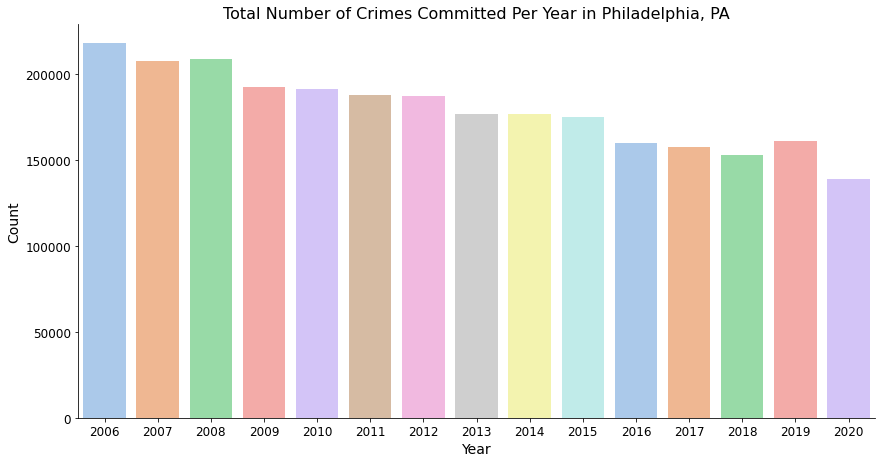

In [10]:
sns.catplot(x='year_nr',
           kind='count',
           palette=("pastel"),
           height=6,
           aspect=2,
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Total Number of Crimes Committed Per Year in Philadelphia, PA", fontsize=16)

#### Fig. 2: Number of Crimes Committed per Month

Text(0.5, 1.0, 'Total Number of Crimes Committed Per Month in Philadelphia, PA')

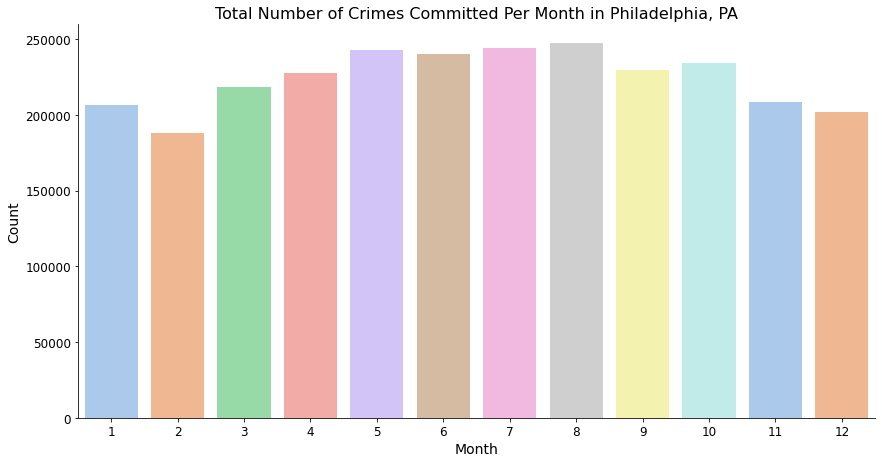

In [11]:
sns.catplot(x='month_nr',
           kind='count',
           palette=("pastel"),
           height=6,
           aspect=2,
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Total Number of Crimes Committed Per Month in Philadelphia, PA", fontsize=16)

#### Fig. 3: Number of Crimes Committed per Hour

Text(0.5, 1.0, 'Total Number of Crimes Committed Per Hour in Philadelphia, PA')

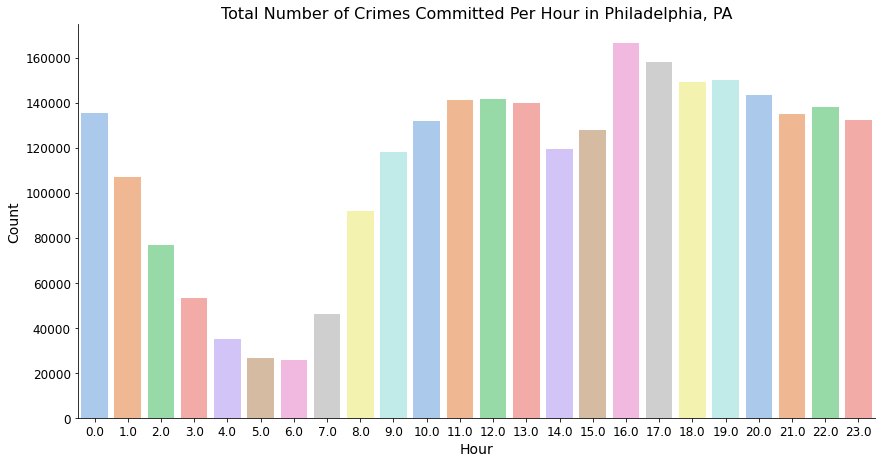

In [12]:
sns.catplot(x='hour_',
           kind='count',
           palette=("pastel"),
           height=6,
           aspect=2,
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Total Number of Crimes Committed Per Hour in Philadelphia, PA", fontsize=16)

#### Fig. 4: Number of Times a Specific Crime was Committed

Text(0.5, 1.0, 'Number of Times a Specific Crime was Committed in Philadelphia,PA')

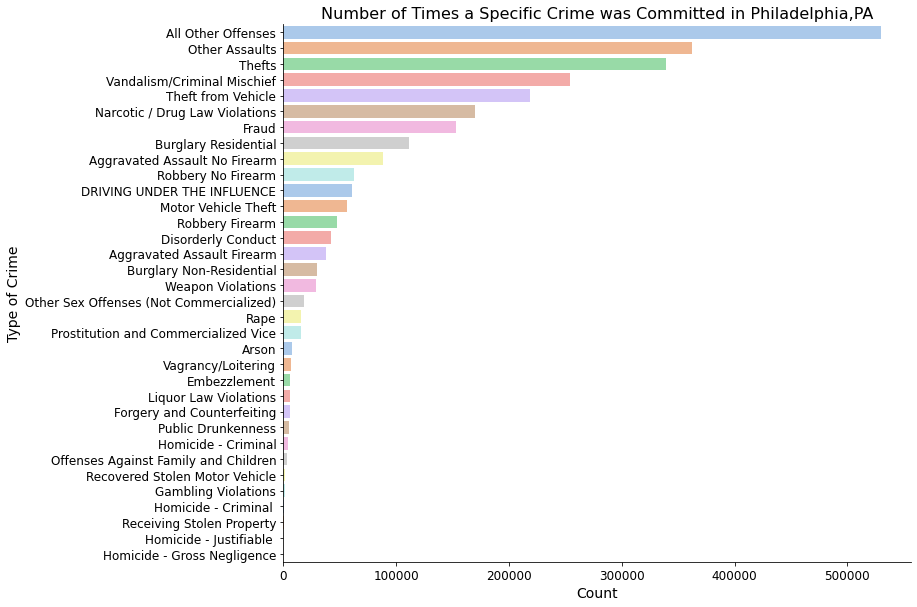

In [13]:
sns.catplot(y='text_general_code',
           kind='count',
           height=8,
           aspect=1.5,
           palette="pastel",
           order=df.text_general_code.value_counts().index,
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Type of Crime", fontsize=14)
plt.title("Number of Times a Specific Crime was Committed in Philadelphia,PA", fontsize=16)

#### Fig. 5: Number of Times a Specific Crime is Committed by Police District

Text(0.5, 1.0, 'Number of Crimes Committed per Philadelphia Police District')

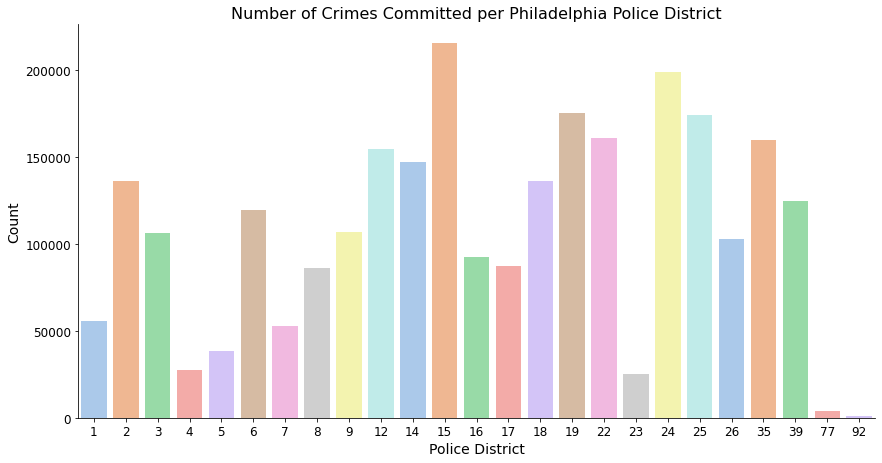

In [14]:
sns.catplot(x='dc_dist',
           kind='count',
           height=6,
           aspect=2,
           palette="pastel",
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Police District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Committed per Philadelphia Police District", fontsize=16)

In [15]:
lng = df['lng']
lat = df['lat']
avg_lng = sum(lng)/len(lng)
avg_lat = sum(lat)/len(lat)

districts_location = df[['dc_dist', 'lng', 'lat']]
districts = districts_location.groupby(['dc_dist']).mean().reset_index()

crime_map = folium.Map(location=[avg_lat, avg_lng],
                       titles = "Stamen Toner",
                       zoom_start = 11)

# Add data for Heatmap 
data_heatmap = df[-25000:]
data_heatmap = data_heatmap[['lat', 'lng']]
data_heatmap = [[row['lat'], row['lng']] for index, row in data_heatmap.iterrows()]

HeatMap(data_heatmap, radius=10).add_to(crime_map)
for i in range(len(districts)):
    folium.Marker([districts['lat'][i], districts['lng'][i]], popup='District' + str(districts['dc_dist'][i])).add_to(crime_map)
    
# Plot
crime_map

### Heatmap Violent Crimes in Philadelphia (2020)

In [16]:
# Display all types of crimes committed
df.text_general_code.unique()

array(['All Other Offenses', 'Homicide - Criminal', 'Other Assaults',
       'Weapon Violations', 'Public Drunkenness',
       'Aggravated Assault No Firearm', 'Disorderly Conduct', 'Thefts',
       'Aggravated Assault Firearm', 'Vandalism/Criminal Mischief',
       'DRIVING UNDER THE INFLUENCE', 'Robbery No Firearm', 'Fraud',
       'Offenses Against Family and Children',
       'Narcotic / Drug Law Violations', 'Motor Vehicle Theft',
       'Theft from Vehicle', 'Burglary Residential', 'Robbery Firearm',
       'Burglary Non-Residential',
       'Other Sex Offenses (Not Commercialized)', 'Rape', 'Arson',
       'Gambling Violations', 'Forgery and Counterfeiting',
       'Embezzlement', 'Liquor Law Violations', 'Vagrancy/Loitering',
       'Homicide - Criminal ', 'Prostitution and Commercialized Vice',
       'Receiving Stolen Property', 'Homicide - Justifiable ',
       'Recovered Stolen Motor Vehicle', 'Homicide - Gross Negligence'],
      dtype=object)

In [17]:
# Some of the most dangerous crime types that may involve weapons
dangerous = ['Weapon Violations', 'Burglary Residential', 'Robbery Firearm', 'Burglary Non-Residential', 'Rape', 'Homicide - Criminal', 'Aggravated Assault Firearm', 'Homicide - Gross Negligence', 'Homicide - Justifiable']

# Create a new DataFrame with 'dangerous' crimes 
dangerous_data = df[df['text_general_code'].isin(dangerous)]

dangerous_data.head()

,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,year_nr,month_nr,day_nr
2538412,0101000020E610000027AAD0A316CF52C07C22570377FB...,0101000020110F0000F7DCF188E9F25FC196DAC1BCDE8A...,2553218,19,P,2006-01-01 00:00:00,2006-01-01,00:00:00,20.0,200619000223,5700 BLOCK RACE STREET,100,Homicide - Criminal,-75.235757,39.964569,39.964569,-75.235757,2006,1,1
2462191,0101000020E6100000E4166F3BDFCE52C01D9E90630CFA...,0101000020110F0000C395586B8BF25FC1125A71F14C89...,2471829,18,Q,2006-01-01 00:04:00,2006-01-01,00:04:00,0.0,200618000007,400 BLOCK S 55TH ST,1500,Weapon Violations,-75.232375,39.953503,39.953503,-75.232375,2006,1,1
2501479,0101000020E6100000253C2510C4CE52C0FD6C608205F8...,0101000020110F000049B016455DF25FC11681C4200E87...,2491139,12,P,2006-01-01 00:05:00,2006-01-01,00:05:00,0.0,200612000011,1700 BLOCK S 58TH ST,1500,Weapon Violations,-75.230717,39.937668,39.937668,-75.230717,2006,1,1
2150236,0101000020E61000007F24788576C952C0EFBAC84E0907...,0101000020110F00001B8143595BE95FC1C0D11574B397...,2142743,35,R,2006-01-01 00:09:00,2006-01-01,00:09:00,0.0,200635000008,6600 BLOCK N 18TH ST,1500,Weapon Violations,-75.147859,40.054972,40.054972,-75.147859,2006,1,1
2483593,0101000020E6100000505389BA68CA52C01B37A92690FF...,0101000020110F000092131CC3F6EA5FC116FB6391698F...,2498010,39,G,2006-01-01 00:10:00,2006-01-01,00:10:00,0.0,200639000009,1900 BLOCK W SOMERSET ST,1500,Weapon Violations,-75.162642,39.996587,39.996587,-75.162642,2006,1,1


In [18]:
lng = dangerous_data['lng']
lat = dangerous_data['lat']
avg_lng = sum(lng)/len(lng)
avg_lat = sum(lat)/len(lat)

crime_map = folium.Map(location=[avg_lat, avg_lng],
                      titles = "Stamen Toner",
                      zoom_start = 11)

# Add data for Heatmap
data_heatmap = dangerous_data[dangerous_data.year_nr == 2020]
data_heatmap = data_heatmap[['lat', 'lng']]
data_heatmap = [[row['lat'], row['lng']] for index, row in data_heatmap.iterrows()]

HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot
crime_map

### Heatmap Thefts in Philadelphia (2020)

According to the graph, 'Number of Times a Specific Crime was Committed in Philadelphia,PA' Theft Crime is the third most committed crime. Let's create a heatmap to analyze where the most thefts occur in Philadelphia during the year 2020. 

In [19]:
theft = ['Thefts']
theft_data = df[df['text_general_code'].isin(theft)]

lng = theft_data['lng']
lat = theft_data['lat']
avg_lng = sum(lng)/len(lng)
avg_lat = sum(lat)/len(lat)

crime_map = folium.Map(location=[avg_lat, avg_lng],
                      titles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmap
data_heatmap = theft_data[theft_data.year_nr == 2020]
data_heatmap = data_heatmap[['lat', 'lng']]
data_heatmap = [[row['lat'],row['lng']] for index, row in data_heatmap.iterrows()]

HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot
crime_map